# DSI Project 2: Ames Housing Sale Price Prediction

## Problem Statement:

In 2011, the Ames Assessor's Office received several requests from the current homeowners asking for advices on remodelling their houses. Homeowners wanted to know which features of the houses should they focus on to make the highest return from sales. Additionally, they wanted to know the future sale prices of those houses given those certain housing features. 

As an employee in the Ames Assessor's Office, I am tasked with creating regression models based on the Ames Housing Dataset, which contained the assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. This model will predict the price of a house at sale and indicate what features have the most and least effect on the house price. I will use R2 and RMSE as evaluation metrics for my models.

## Executive Summary:

I started off the project by importing the relevant libraries and two datasets: Train and Test. Train dataset is the data that is needed to be fitted with the Test dataset to evaluate the model. Both datasets have the same features of the house, but Train dataset has the additional feature of "SalePrice", which is our target variable. 

I looked at size and general information of the datasets. Then, I began cleaning the dataset by filling in the missing data as we cannot have null values in our model. I explored the data visualization of the train dataset through histograms, heat map, box plots, and scatter plots. The visualization provided the insights in terms of correlation and outliers between the target variable and other features. I found that the top features for my regression model would be Overall Qual, Gr Liv Area, Garage Area, and Garage Cars as these features have the strongest positive correlation to Sale Price. I also created dummy variables for nominal data and mapped ordinal data with corresponding values based on information given in data dictionary. Then, I dropped some outliers to ensure better prediction for the model. 

I used train/test split to fit both datasets to one another. Then, I created the model benchmarks and linear regression model.I used R2 and RMSE as evaluation metrics for my model. Additionally, I used Ridge and Lasso regression to regularize my regression model. After finding the optimal alpha, I ran the models to find that Lasso regression performed slightly better than Ridge regression, hence I used Lasso model for my final evaluation and Kaggle submission. 

## Directory

1. [EDA and Cleaning](#EDA-and-Cleaning)
2. [Preprocessing and Feature Engineering](Preprocessing-and-Feature-Engineering)
3. [Model Benchmarks](Model-Benchmarks)
4. [Production Models](Production-Models)
5. [Model Fitting and Evaluation](Model-Fitting-and-Evaluation)
6. [Kaggle Submission](Kaggle-Submission)
 

## EDA and Cleaning

In [138]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso,  ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [12]:
#import train and test datasets
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [13]:
#take a look at train dataset
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [14]:
#take a look at test dataset
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [15]:
#set index for the datasets
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

In [16]:
#check if set index works
train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [17]:
#check if set index works
test.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [18]:
#check the info of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [19]:
#check the info of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              879 non-null    int64  
 1   MS SubClass      879 non-null    int64  
 2   MS Zoning        879 non-null    object 
 3   Lot Frontage     719 non-null    float64
 4   Lot Area         879 non-null    int64  
 5   Street           879 non-null    object 
 6   Alley            58 non-null     object 
 7   Lot Shape        879 non-null    object 
 8   Land Contour     879 non-null    object 
 9   Utilities        879 non-null    object 
 10  Lot Config       879 non-null    object 
 11  Land Slope       879 non-null    object 
 12  Neighborhood     879 non-null    object 
 13  Condition 1      879 non-null    object 
 14  Condition 2      879 non-null    object 
 15  Bldg Type        879 non-null    object 
 16  House Style      879 non-null    object 
 17  Overall Qual

In [20]:
#check the size of train dataset
train.shape

(2051, 80)

In [21]:
#check the size of test dataset
test.shape

(879, 79)

At first, there were 81 columns in train dataset and 80 columns in test dataset. After setting the index, we have 80 and 79 columns in datasets respectively. Train dataset has the additional column of SalePrice, which is our target variable. The rest of the columns are features of residential properties that we will use to evaluate the SalePrice. There are 2,051 rows in train dataset and 879 rows in test dataset, representing each house in the city. 

Now, I will clean the data to input in our model. 

In [22]:
#Look for null values in train dataset
train.isnull().sum().sort_values().tail(26)

BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Area          1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        22
Mas Vnr Type        22
BsmtFin Type 1      55
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 2      56
Bsmt Exposure       58
Garage Type        113
Garage Yr Blt      114
Garage Cond        114
Garage Finish      114
Garage Qual        114
Lot Frontage       330
Fireplace Qu      1000
Fence             1651
Alley             1911
Misc Feature      1986
Pool QC           2042
dtype: int64

There are 26 columns in train dataset that have null values. 

In [23]:
#Look for null values in test dataset
test.isnull().sum().sort_values().tail(19)

Mas Vnr Type        1
Electrical          1
Mas Vnr Area        1
BsmtFin Type 2     25
Bsmt Cond          25
Bsmt Qual          25
Bsmt Exposure      25
BsmtFin Type 1     25
Garage Type        44
Garage Finish      45
Garage Yr Blt      45
Garage Qual        45
Garage Cond        45
Lot Frontage      160
Fireplace Qu      422
Fence             707
Alley             821
Misc Feature      838
Pool QC           875
dtype: int64

There are 19 columns in test dataset that have null values. 

Because we cannot have null values in our regression model, I will impute the missing data with value (either 0 and NA) according to the dictionary. Since there is no perfect way to compensate for the missing value, I decided to impute 0 and NA in the missing value columns according to the housing market dictionary.

In [24]:
#fill in the missing data with the correct value according to housing market dictionary
#fix 26 missing value columns for train dataset

train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna('0')
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna('0')
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna('0')
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna('0').astype('float') #change datatype to plot scatterplot
train['Garage Area'] = train['Garage Area'].fillna('0').astype('float') #change datatype to plot scatterplot
train['Garage Cars'] = train['Garage Cars'].fillna('0')
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna('0')
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna('0')
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna('0')
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna('NA')
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('NA')
train['Bsmt Qual'] = train['Bsmt Qual'].fillna('NA')
train['Bsmt Cond'] = train['Bsmt Cond'].fillna('NA')
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('NA')
train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('NA')
train['Garage Type'] = train['Garage Type'].fillna('NA')
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna('0')
train['Garage Cond'] = train['Garage Cond'].fillna('NA')
train['Garage Finish'] = train['Garage Finish'].fillna('NA')
train['Garage Qual'] = train['Garage Qual'].fillna('NA')
train['Lot Frontage'] = train['Lot Frontage'].fillna('0')
train['Fireplace Qu'] = train['Fireplace Qu'].fillna('NA')
train['Fence'] = train['Fence'].fillna('NA')
train['Alley'] = train['Alley'].fillna('NA')
train['Misc Feature'] = train['Misc Feature'].fillna('NA')
train['Pool QC'] = train['Pool QC'].fillna('NA')

In [25]:
#Again, see if there are still any null values in train dataset
train.isnull().sum()

PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
Lot Area        0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 80, dtype: int64

In [26]:
#fix 19 missing value columns for test dataset

test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna('NA')
test['Electrical'] = test['Electrical'].fillna('NA')
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna('0')
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].fillna('0')
test['Bsmt Cond'] = test['Bsmt Cond'].fillna('NA')
test['Bsmt Qual'] = test['Bsmt Qual'].fillna('NA')
test['Bsmt Exposure'] = test['Bsmt Exposure'].fillna('NA')
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].fillna('NA')
test['Garage Type'] = test['Garage Type'].fillna('NA')
test['Garage Finish'] = test['Garage Finish'].fillna('NA')
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna('0')
test['Garage Qual'] = test['Garage Qual'].fillna('NA')
test['Garage Cond'] = test['Garage Cond'].fillna('NA')
test['Lot Frontage'] = test['Lot Frontage'].fillna('0')
test['Fireplace Qu'] = test['Fireplace Qu'].fillna('NA')
test['Fence'] = test['Fence'].fillna('NA')
test['Alley'] = test['Alley'].fillna('NA')
test['Misc Feature'] = test['Misc Feature'].fillna('NA')
test['Pool QC'] = test['Pool QC'].fillna('NA')

In [27]:
#Again, see if there are still any null values in test dataset
test.isnull().sum()

PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
Lot Area        0
               ..
Misc Feature    0
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
Length: 79, dtype: int64

I finished imputing the missing value for both datasets. 

Now, I will use exploratory visualization to look at relationships between features. 

## Data Visualization

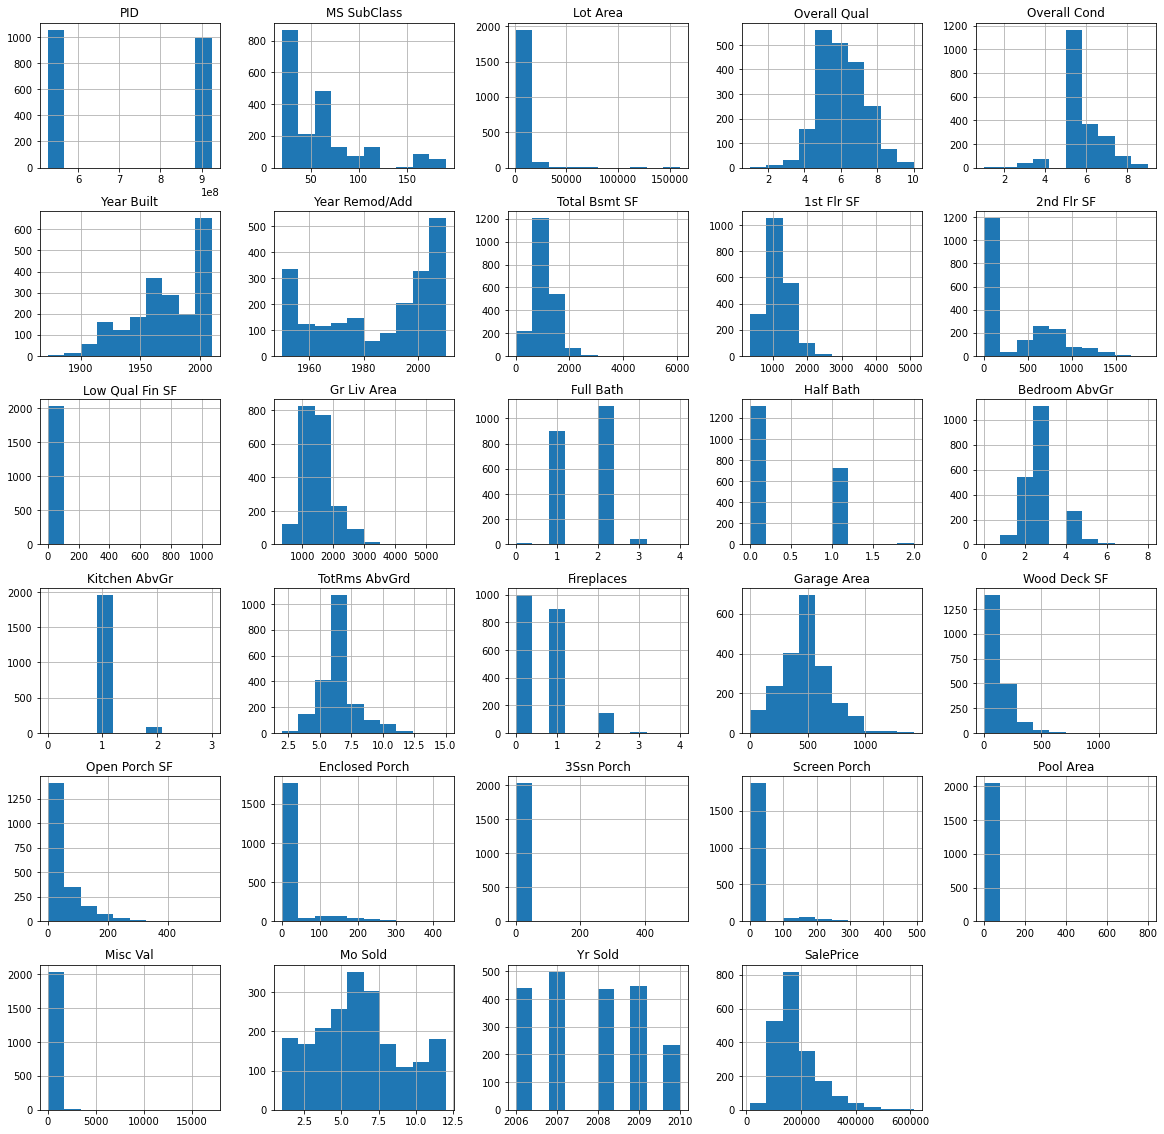

In [28]:
#create histogram from the train dataset
train.hist(figsize=(20,20));

From histograms, we can observe the distribution for each feature. For our target variable, SalePrice, the distribution seems to be normal distribution while several other features are not i.e. Year Built and 1st Flr SF data are skewed. To further look at features that correlate with SalePrice, I will create heatmap.

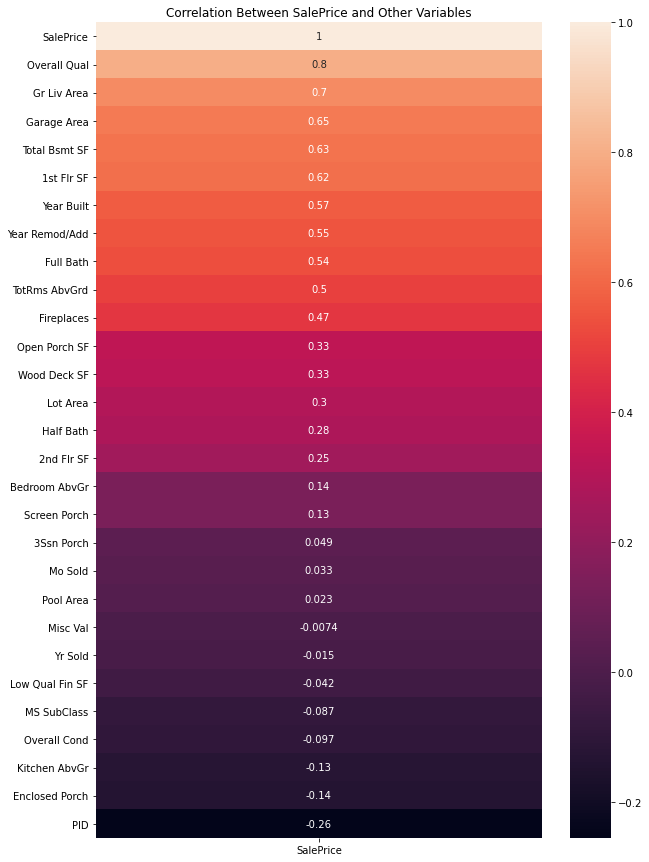

In [29]:
#create heatmap with respect to SalePrice
plt.figure(figsize=(10,15)) 
plt.title('Correlation Between SalePrice and Other Variables') 
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), annot = True); 

The heatmap ranks features from highest correlation to SalePrice to lowest. Overall Qual, Gr Liv Area, 1st Flr SF, Year Built, Year Remod/Add and Full Bath are features that will be used in our model since they have high correlation (>0.5) with Sale Price. 

Now, I will create pairplots between target variable and features with high correlation.

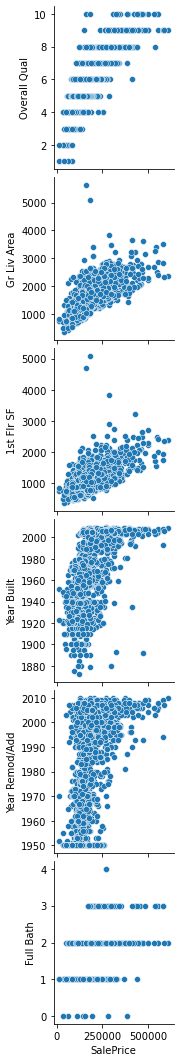

In [30]:
#create pairplots between SalePrice and features with high correlation
sns.pairplot(train,y_vars=['Overall Qual', 'Gr Liv Area', '1st Flr SF', 'Year Built', 'Year Remod/Add','Full Bath'],x_vars=['SalePrice'],diag_kind=None);

From the above pairplots, we can see that Overall Qual and Full Bath are discrete data with some outliers. All the features show strong positive correlation with SalePrice as expected. Gr Liv Area, 1st Flr SF, Year Built, and Year Remod/Add data are closely grouped, which indicate some outliers as well.

Now, I will create boxplot for discrete variables to check for outliers. My boxplots will be created against SalePrice to compare the range between high correlation features and my target variable. Below are boxplots of Overall Qual, Garage Cars, and Full Bath; each feature is plotted against SalesPrice.

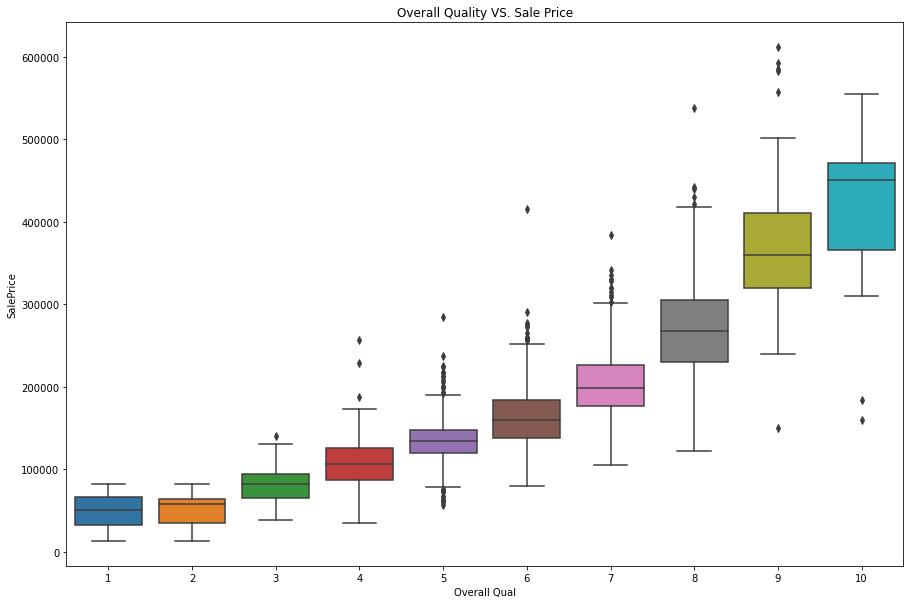

In [31]:
#create boxplot to check for outliers
#Start with feature with highest correlation to saleprice; overall qual
plt.figure(figsize=(15,10))  
sns.boxplot(x = train['Overall Qual'],y= train['SalePrice'])
plt.title("Overall Quality VS. Sale Price")
plt.xlabel('Overall Qual')
plt.ylabel('SalePrice');

From the above boxplot, we can see that higher overall quality leads to the greater the variability. There are many outliers as well, which we will consider removing them after.  

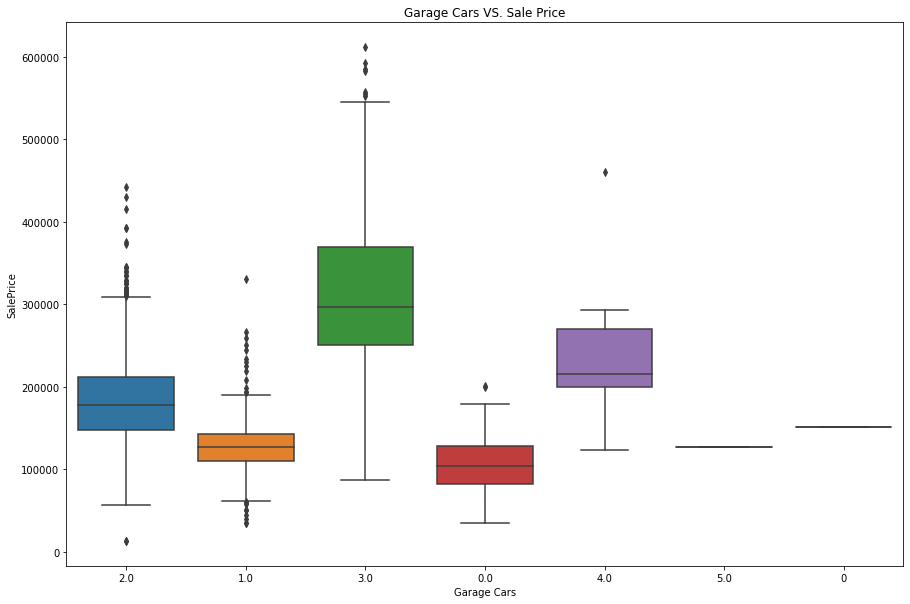

In [32]:
#create boxplot of garage cars vs. sale price to check for outliers
plt.figure(figsize=(15,10))  
sns.boxplot(x = train['Garage Cars'],y =train['SalePrice'])
plt.title("Garage Cars VS. Sale Price")
plt.xlabel('Garage Cars')
plt.ylabel('SalePrice');

The above boxplot has error in terms of unordered X-axis label. However, we can still see that the higher number of garage cars leads to the greater the variability, but only until a certain number of garage cars, which is 3 cars. There are many outliers as well, which we will consider removing them after.  

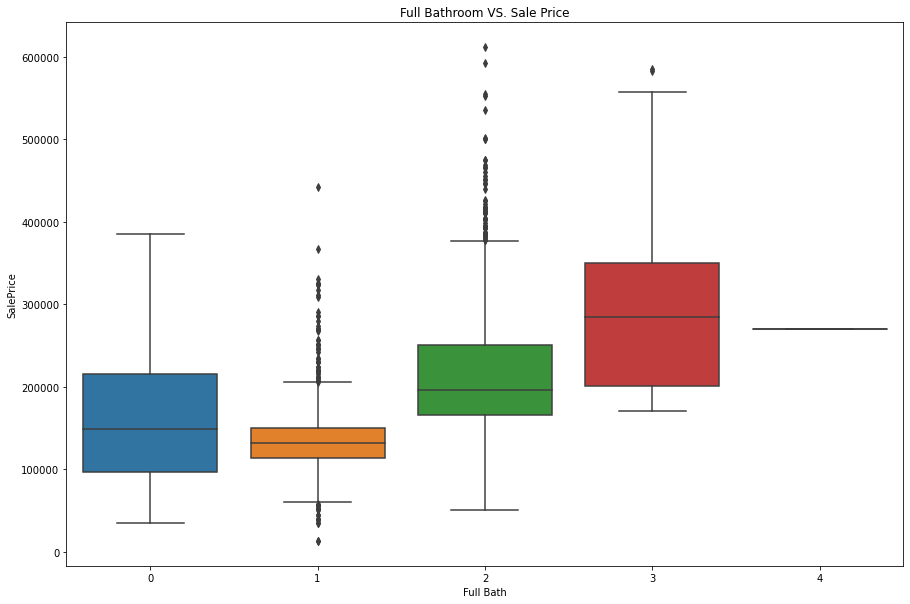

In [33]:
#create boxplot of full bathrooms vs.sale price to check for outliers
plt.figure(figsize=(15,10))  
sns.boxplot(x = train['Full Bath'],y =train['SalePrice'],)
plt.title("Full Bathroom VS. Sale Price")
plt.xlabel('Full Bath')
plt.ylabel('SalePrice');

From the above boxplot, we can see that the higher number of full bathroom leads to greater variability. There are many outliers especially for 1 and 2 full bath, which we will consider removing them after.  

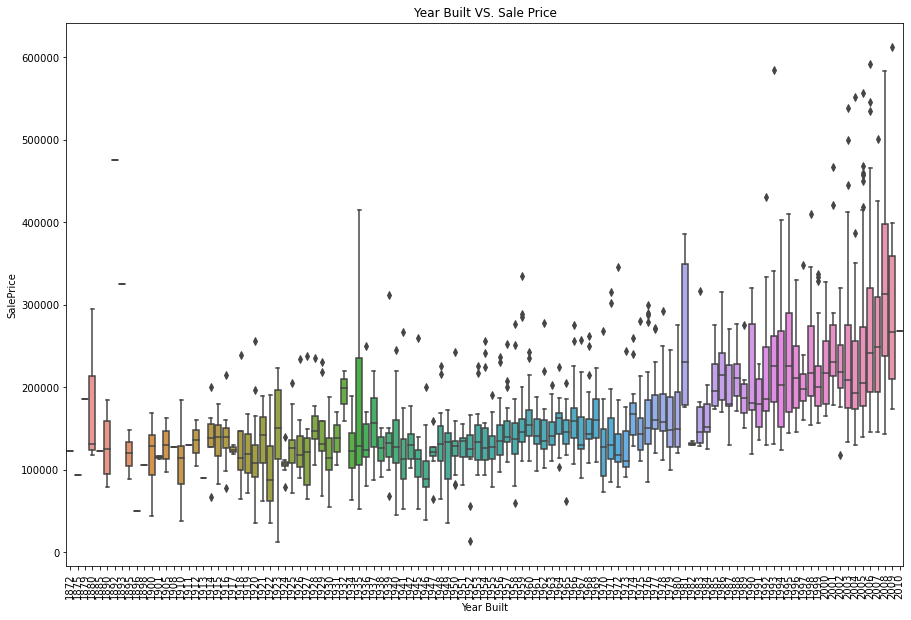

In [34]:
#create boxplot of year built vs.sale price to check for outliers
plt.figure(figsize=(15,10))  
sns.boxplot(x = train['Year Built'],y =train['SalePrice'],)
plt.title("Year Built VS. Sale Price")
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.xticks(rotation = 90);

From the above boxplot, we can see that the newer year the house was built leads to greater variability. There are also many outliers, which we will consider removing them after.

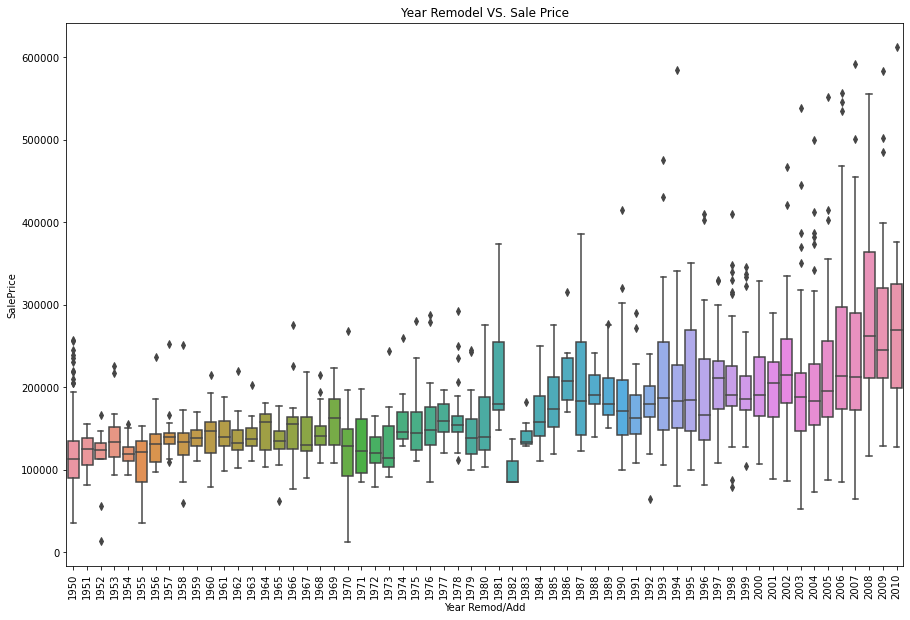

In [35]:
#create boxplot of year remodel/add vs.sale price to check for outliers
plt.figure(figsize=(15,10))  
sns.boxplot(x = train['Year Remod/Add'],y =train['SalePrice'],)
plt.title("Year Remodel VS. Sale Price")
plt.xlabel('Year Remod/Add')
plt.ylabel('SalePrice')
plt.xticks(rotation = 90);

From the above boxplot, we can see that the newer year the house was remodeled leads to greater variability. There are also many outliers, which we will consider removing them after.

Next, I would create scatter plots on continuous features to see the patterns and correlation of the data. Below are the scatter plots for Gr live area, Garage Area, Total Bsmt SF, 1st Flr SF; each feature is plotted against SalesPrice.

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


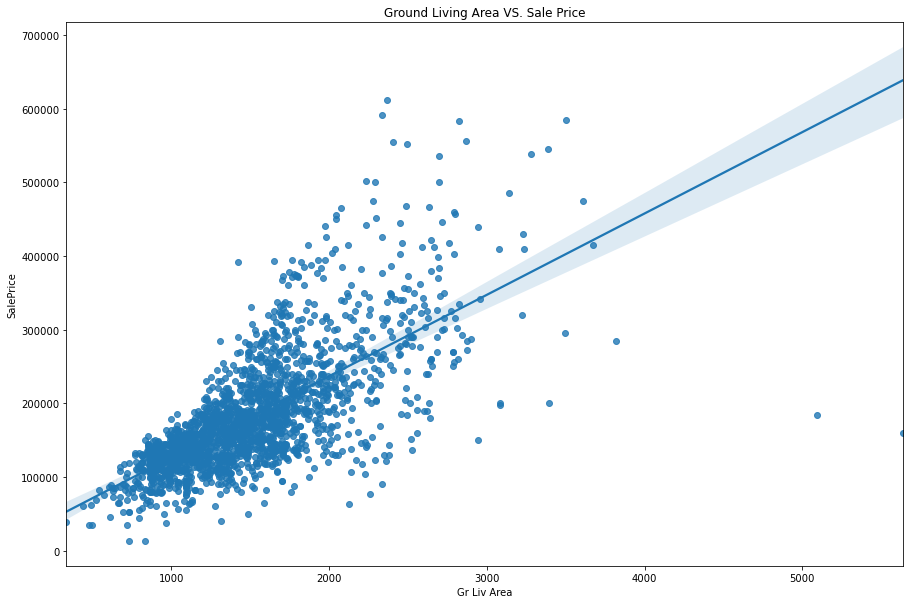

In [36]:
#Scatter plot of Ground living area vs. sale price
plt.figure(figsize=(15,10))
sns.regplot(train['Gr Liv Area'], train['SalePrice'])
plt.title('Ground Living Area VS. Sale Price') 
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice');

The above scatter plot shows a strong positive correlation between ground living area and sale price. While the data is closely grouped in 1000-2000 square feet of ground living area, there are some outliers as well.

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


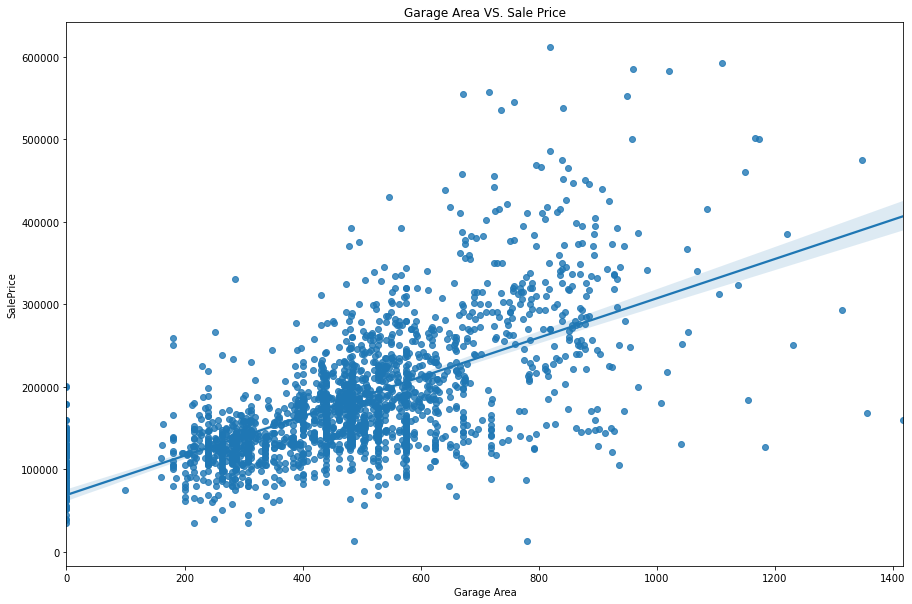

In [37]:
#Scatter plot of Garage Area vs. sale price
plt.figure(figsize=(15,10))
sns.regplot(train['Garage Area'], train['SalePrice'])
plt.title('Garage Area VS. Sale Price') 
plt.xlabel('Garage Area')
plt.ylabel('SalePrice');

The above scatter plot shows a strong positive correlation between garage area and sale price. While the data is closely grouped in 200-600 square feet, there are some outliers as well.

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


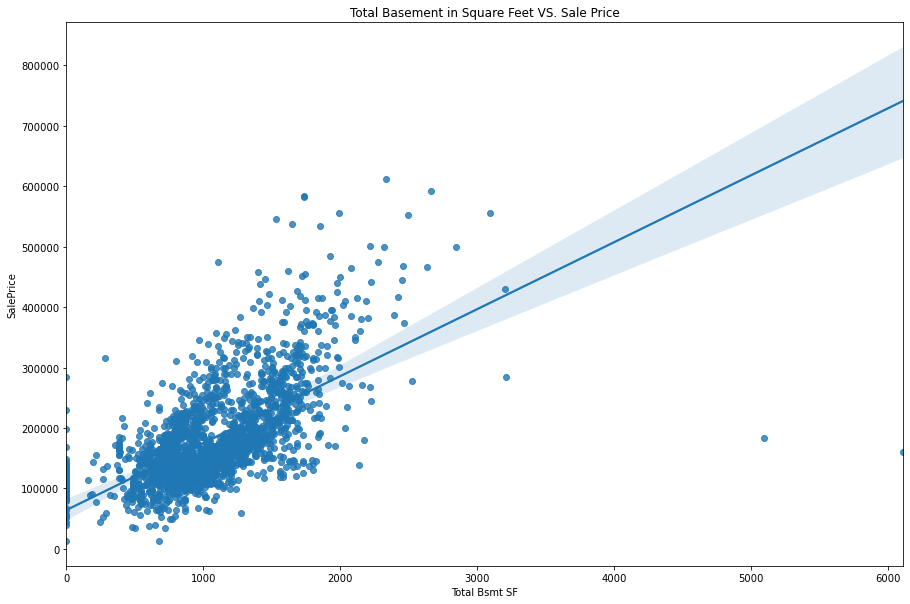

In [38]:
#Scatter plot of total basement in square feet vs. sale price
plt.figure(figsize=(15,10))
sns.regplot(train['Total Bsmt SF'], train['SalePrice'])
plt.title('Total Basement in Square Feet VS. Sale Price') 
plt.xlabel('Total Bsmt SF')
plt.ylabel('SalePrice');

The above scatter plot shows a strong positive correlation between total basement area and sale price. While the data is closely grouped in 1000-2000 square feet, there are some outliers as well.

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


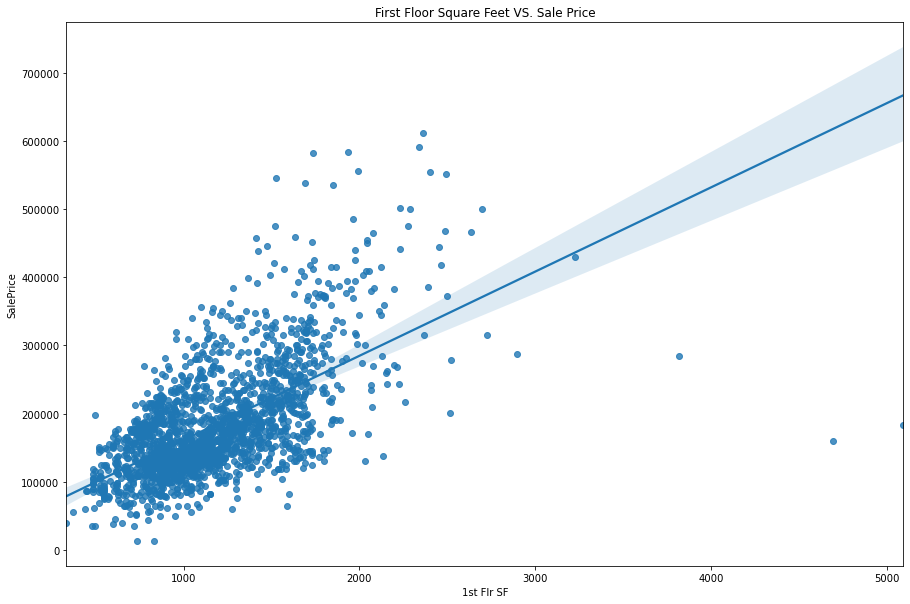

In [39]:
#Scatter plot of First Floor Square Feet vs. sale price
plt.figure(figsize=(15,10))
sns.regplot(train['1st Flr SF'], train['SalePrice'])
plt.title('First Floor Square Feet VS. Sale Price') 
plt.xlabel('1st Flr SF')
plt.ylabel('SalePrice');

The above scatter plot shows a strong positive correlation between first floor in square feet and sale price. While the data is closely grouped in 1000-2000 first floor square feet, there are some outliers as well.

## Dropping Outliers

After investigating these visualization and reading the data dictionary, I believe the outliers need to be dropped before proceeding. In the Special Notes section in data dictionary, we are advised to drop "any houses with more than 4000 square feet from the dataset." Therefore, I will eliminate these outliers below.

In [40]:
#check the dataset shape before dropping outliers
train.shape

(2051, 80)

In [41]:
#drop the outliers 
train = train[train['Gr Liv Area'] < 4000]

In [42]:
#check the dataset shape after dropping outliers
train.shape

(2049, 80)

## Dummies

In our dataset, we have both nominal and ordinal data, which are qualitative data. Therefore, we need to convert these data into numerical in order to process with linear regression

First, I will create dummy variables for columns with nominal data.

In [43]:
#create a list of all features that need to be dummied 
dummy_columns = ['MS SubClass', 
                 'MS Zoning',
                 'Street',
                 'Alley', 
                 'Land Contour', 
                 'Lot Config', 
                 'Neighborhood',
                 'Condition 1',
                 'Condition 2',
                 'Bldg Type',
                 'House Style',
                 'Roof Style',
                 'Roof Matl',
                 'Exterior 1st',
                 'Exterior 2nd',
                 'Mas Vnr Type',
                 'Foundation',
                 'Heating',
                 'Central Air',
                 'Garage Type',
                 'Misc Feature',
                 'Sale Type']

In [44]:
#create dummy columns in train dataset
train = pd.get_dummies(train, columns = dummy_columns);

In [45]:
#create dummy columns in test dataset
test = pd.get_dummies(test, columns = dummy_columns);

In [46]:
#check if number of columns increases for train dataset
train.shape

(2049, 233)

In [47]:
#check if number of columns increases for test dataset
test.shape

(879, 224)

Before creating dummy columns, we have 80 and 79 columns in train and test dataset respectively. After creating dummy columns, we now have 235 and 224 columns in dataset.

## Mapping Data

Next, I will use replace method to input the right rating scale in columns with ordinal data according to housing market dictionary.

In [48]:
#Replace Lot Shape data in both datasets
train['Lot Shape'].replace({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}, inplace = True)
test['Lot Shape'].replace({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}, inplace = True)

In [49]:
#Replace Utilities data in both datasets
train['Utilities'].replace({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2}, inplace = True)
test['Utilities'].replace({'AllPub': 4, 'NoSewr': 3}, inplace = True)

In [50]:
#Replace Land Slope data in both datasets
train['Land Slope'].replace({'Gtl': 3, 'Mod': 3, 'Sev': 2}, inplace = True)
test['Land Slope'].replace({'Gtl': 3, 'Mod': 3, 'Sev': 2}, inplace = True)

In [51]:
#Replace Exter Qual data in both datasets
train['Exter Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}, inplace = True)
test['Exter Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}, inplace = True)

In [52]:
#Replace Exter Cond data in both datasets
train['Exter Cond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace = True)
test['Exter Cond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace = True)

In [53]:
#Replace Bsmt Qual data in both datasets
train['Bsmt Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)
test['Bsmt Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)

In [54]:
#Replace Bsmt Cond data in both datasets
train['Bsmt Cond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)
test['Bsmt Cond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)

In [55]:
#Replace Bsmt Exposure data in both datasets
train['Bsmt Exposure'].replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}, inplace = True)
test['Bsmt Exposure'].replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}, inplace = True)

In [56]:
#Replace BsmtFin Type 1 data in both datasets
train['BsmtFin Type 1'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace = True)
test['BsmtFin Type 1'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace = True)

In [57]:
#Replace BsmtFin Type 2 data in both datasets
train['BsmtFin Type 2'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace = True)
test['BsmtFin Type 2'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace = True)

In [58]:
#Replace Heating QC data in both datasets
train['Heating QC'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace = True)
test['Heating QC'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}, inplace = True)

In [59]:
#Replace Electrical data in both datasets
train['Electrical'].replace({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1}, inplace = True)
test['Electrical'].replace({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'NA': 1}, inplace = True)

In [60]:
#Replace Kitchen Qual data in both datasets
train['Kitchen Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}, inplace = True)
test['Kitchen Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace = True)

In [61]:
#Replace Functional data in both datasets
train['Functional'].replace({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}, inplace = True)
test['Functional'].replace({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}, inplace = True)

In [62]:
#Replace Fireplace Qu data in both datasets
train['Fireplace Qu'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)
test['Fireplace Qu'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)

In [63]:
#Replace Garage Finish data in both datasets
train['Garage Finish'].replace({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}, inplace = True)
test['Garage Finish'].replace({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}, inplace = True)

In [64]:
#Replace Garage Qual data in both datasets
train['Garage Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)
test['Garage Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)

In [65]:
#Replace Garage Cond data in both datasets
train['Garage Cond'].replace({'Ex' : 5, 'Gd': 4, 'TA' : 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)
test['Garage Cond'].replace({'Ex' : 5, 'Gd': 4, 'TA' : 3, 'Fa': 2, 'Po': 1, 'NA': 0}, inplace = True)

In [66]:
#Replace Paved Drive data in both datasets
train['Paved Drive'].replace({'Y': 3, 'P': 2, 'N': 1}, inplace = True)
test['Paved Drive'].replace({'Y': 3, 'P': 2, 'N': 1}, inplace = True)

In [67]:
#Replace Pool QC data in both datasets
train['Pool QC'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0}, inplace = True)
test['Pool QC'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0}, inplace = True)

In [68]:
#Replace Fence data in both datasets
train['Fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}, inplace = True)
test['Fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}, inplace = True)

In [69]:
#create a list of the above ordinal columns
ordinal_cols = ['Lot Shape', 
                       'Utilities', 
                       'Land Slope', 
                       'Overall Qual', 
                       'Overall Cond', 
                       'Exter Qual',
                       'Exter Cond',
                       'Bsmt Qual',
                       'Bsmt Cond',
                       'Bsmt Exposure',
                       'BsmtFin Type 1',
                       'BsmtFin Type 1',
                       'Heating QC',
                       'Electrical',
                       'Kitchen Qual',
                       'Functional',
                       'Fireplace Qu',
                       'Garage Finish',
                       'Garage Qual',
                       'Garage Cond',
                       'Paved Drive',
                       'Pool QC',
                       'Fence']

In [70]:
#check if the replacement for ordinal columns work
train[ordinal_cols]

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
109,3,4,3,6,8,4,3,3,3,1,...,5,4,8,0,2,3,3,3,0,0
544,3,4,3,7,5,4,3,4,3,1,...,5,4,8,3,2,3,3,3,0,0
153,4,4,3,5,7,3,4,3,3,1,...,5,4,8,0,1,3,3,3,0,0
318,4,4,3,5,5,3,3,4,3,1,...,5,3,8,0,3,3,3,3,0,0
255,3,4,3,6,8,3,3,2,4,1,...,5,3,8,0,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,3,4,3,8,5,4,3,4,3,3,...,5,4,8,4,3,3,3,3,0,0
785,3,4,3,4,5,3,3,3,3,1,...,5,3,8,0,1,3,3,3,0,0
916,4,4,3,6,6,3,3,3,3,1,...,5,3,8,3,1,2,2,3,0,0


In [71]:
test[ordinal_cols]

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
2658,4,4,3,6,8,3,2,2,3,1,...,2,2,8,0,1,1,1,3,0,0
2718,3,4,3,5,4,3,3,4,3,1,...,5,3,8,0,3,3,3,3,0,0
2414,3,4,3,7,5,4,3,4,4,3,...,5,4,8,4,2,3,3,3,0,0
1989,4,4,3,5,6,4,3,3,3,1,...,5,3,8,0,1,2,3,1,0,0
625,3,4,3,6,5,3,3,4,3,1,...,5,3,8,4,2,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,4,4,3,6,6,3,3,3,3,1,...,5,3,8,3,1,3,3,3,0,0
1234,4,4,3,6,7,4,4,3,3,1,...,5,4,8,4,2,3,3,3,0,3
1373,4,4,3,5,5,3,3,3,3,1,...,5,3,8,3,1,3,3,3,0,0


We will now move on to preprocessing and feature engineering.

## Preprocessing and Feature Engineering

### Drop the missing columns

Before we run our model, we need to check if both train and test data have the same number of columns. If not, we need to drop the missing columns.

In [72]:
#check train dataset shape
train.shape

(2049, 233)

In [73]:
#check test dataset shape
test.shape

(879, 224)

Since there are more columns in train dataset, we will find out which columns are different in each datasets and create those columns in each datasets accordingly.

In [74]:
#find the missing columns in train dataset
missing_cols_train = list(set(test.columns) - set(train.columns))

In [75]:
missing_cols_train

['Sale Type_VWD',
 'Roof Matl_Metal',
 'Heating_Floor',
 'Mas Vnr Type_CBlock',
 'Exterior 2nd_PreCast',
 'Exterior 2nd_Other',
 'Exterior 1st_PreCast',
 'Roof Matl_Roll']

In [76]:
#find the missing columns in test dataset
missing_cols_test = list(set(train.columns) - set(test.columns))

In [77]:
missing_cols_test

['Condition 2_Artery',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Misc Feature_TenC',
 'MS Zoning_A (agr)',
 'Exterior 1st_Stone',
 'SalePrice',
 'Roof Matl_Membran',
 'Neighborhood_GrnHill',
 'Heating_OthW',
 'Exterior 2nd_Stone',
 'MS SubClass_150',
 'Heating_Wall',
 'Condition 2_RRNn',
 'Exterior 1st_ImStucc',
 'Neighborhood_Landmrk',
 'Exterior 1st_CBlock']

In [78]:
#input missing columns in train dataset
for column in missing_cols_train: 
    train[column] = 0

In [79]:
#check if our method works 
train['Heating_Wall'].head()

Id
109    0
544    0
153    0
318    0
255    0
Name: Heating_Wall, dtype: uint8

In [80]:
#check shape of train dataset again
train.shape

(2049, 241)

In [81]:
#input missing columns in test dataset
for column in missing_cols_test: 
    test[column] = 0

In [82]:
#check if our method works 
test['Condition 2_Artery'].head()

Id
2658    0
2718    0
2414    0
1989    0
625     0
Name: Condition 2_Artery, dtype: int64

In [83]:
#check shape of test dataset again
test.shape

(879, 241)

### Drop dummy columns

In [84]:
#drop the first dummy columns in both datasets
for dummy in dummy_columns:
    dummy_list = [col for col in train.columns if dummy in col]
    train.drop(columns = dummy_list[0], inplace = True)
    test.drop(columns = dummy_list[0], inplace = True)

In [85]:
#check shape of train dataset
train.shape

(2049, 219)

In [86]:
#check shape of test dataset
test.shape

(879, 219)

### Scaling

Next, we will scale our data to normalize the data since we have different scales for some of the features. 

In [87]:
#create X and y variables
X = train.drop(columns = ['SalePrice'], axis = 1) 
features = list(X.columns) 
y = train['SalePrice']

In [88]:
#evaluate train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [89]:
#scale and fit the data
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [90]:
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

## Model Benchmarks

Now, we will create the baseline model

In [92]:
#calculate the mean of target variable
y_avg = y_test.mean()
y_avg

181457.50877192983

In [93]:
#create baseline prediction
baseline_preds = [y_avg for i in y]

In [94]:
#calculate baseline R2 scores 
r2_score(y,baseline_preds)

-7.361433107533344e-08

A negative  𝑅2  means that the regression model is performing worse than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.

In [154]:
#calculate baseline RMSE
np.sqrt(mean_squared_error(y, baseline_preds))

79276.56390558237

Our baseline model shows that our prediction will have approximaltely +/- 79276 errors.

## Production Models

### Linear Regression

In [155]:
#instantiate and fit linear model
lr = LinearRegression()
lr.fit(X_scaled_train,y_train)

LinearRegression()

Cross-validate the $R^2$ of an ordinary linear regression model with 5 cross-validation folds.

In [156]:
#R2 on unseen data from linear regression
lr_cv_scores = cross_val_score(lr, X_scaled_train, y_train,cv=5) 
lr_cv_scores.mean()

-6.203213758152376e+20

In [153]:
#RMSE on unseen data from linear model
lr_rmse_cv_scores = np.abs(cross_val_score(lr, X_scaled_train, y_train,cv= 5, scoring='neg_root_mean_squared_error'))
lr_rmse_cv_scores.mean()

1069556644863256.8

R2 score is negative, which indicates that the linear regression is performing far worse than baseline of the test dataset. Therefore, the linear model is probably overfitting and has redundant variables. Also, the high RMSE score shows that linear regression will give out high errors in our prediction. Therefore, we should look for other models to predict our data.

### Ridge Regression

First, let's find out optimal alpha value for ridge regression

In [157]:
#find out which alpha to choose
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_scaled_train, y_train)
print(optimal_ridge.alpha_)

236.4489412645407


Cross-validate the $R^2$ of a ridge regression model with 5 cross-validation folds.

In [100]:
#Ridge R2 score on train data
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_cv_scores = cross_val_score(ridge, X_scaled_train, y_train, cv=5)
ridge_cv_scores.mean()

0.8985322226538128

In [101]:
#Ridge RMSE on train data 
ridge_rmse_cv_scores = np.abs(cross_val_score(ridge, X_scaled_train, y_train,cv= 5, scoring='neg_root_mean_squared_error'))
ridge_rmse_cv_scores.mean()

25097.438480598066

Ridge regression performs much better than Linear regression as R2 score from ridge regression is 89.8%. Ridge regression is able to manage multicollinearity and get a good out-of-sample results as the estimated error is also a lot lesser than linear regression's. Let's see how Lasso regression is going to perform.

### Lasso Regression

First, let's find out optimal alpha value for lasso regression

In [102]:
#find out which alpha to choose
optimal_lasso = LassoCV(n_alphas=100, cv=5)
optimal_lasso.fit(X_scaled_train, y_train)
print(optimal_lasso.alpha_)

551.5890972965998


Cross-validate the $R^2$ of lasso regression model with 5 cross-validation folds.

In [161]:
#Lasso R2 score on train data
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_cv_scores = cross_val_score(lasso, X_scaled_train, y_train, cv=5)
lasso_cv_scores.mean()

0.9022523108724902

In [162]:
#Lasso RMSE score on train data
lasso_rmse_cv_scored = np.abs(cross_val_score(lasso, X_scaled_train, y_train,cv= 5, scoring='neg_root_mean_squared_error'))
lasso_rmse_cv_scored.mean()

24641.47957217064

Lasso regression performs slightly better than ridge regression as R2 score from lasso regression is 90.2%. Lasso regression is also able to manage multicollinearity and eliminates features that are not useful. It chooses the best of correlated variables and zero-out the redundant ones, resulting in slightly less estimated error compared to ridge model.

### Elastic net regression

First, let's find out optimal alpha value and l1 ratio for elastic net regression

In [107]:
#find out the optimal alpha and l1 ratio
l1_ratios = np.linspace(0.01, 1.0, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1)
optimal_enet.fit(X_scaled_train, y_train)
print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

514.413838243103
1.0


...................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   18.8s finished


The optimal l1 ratio is 1, indicating that lasso regression is the best performing model for our data.

Therefore, among the three models, Lasso gives us the highest R2 and lease RMSE, so we will use lasso model to proceed with the evaluation

## Model Fitting and Evaluation

Fit the model to the training data, and evaluate the training and test scores below.

### Lasso Regression 

In [164]:
#lasso model fitting
lasso.fit(X_scaled_train,y_train) 

Lasso(alpha=551.5890972965998)

In [165]:
print('Training R2 (Lasso)', lasso.score(X_scaled_train,y_train)) #how model performs on train data
print('Training CV R2 (Lasso)', lasso_cv_scores.mean()) #estimate of how model is going to perform on test data
print('Testing R2 (Lasso)', lasso.score(X_scaled_test,y_test)) #how model actually performs on test data

Training R2 (Lasso) 0.9227203442281859
Training CV R2 (Lasso) 0.9022523108724902
Testing R2 (Lasso) 0.9174782316015336


In [166]:
print('Training RMSE (Lasso)', np.sqrt(mean_squared_error(y_train, lasso.predict(X_scaled_train)))) #estimate error on train data
print('Training CV RMSE (Lasso)', lasso_rmse_cv_scored.mean()) #estimate error on test data
print('Testing RMSE (Lasso)', np.sqrt(mean_squared_error(y_test, lasso.predict(X_scaled_test)))) #actual estimate error on test data

Training RMSE (Lasso) 22016.387024414154
Training CV RMSE (Lasso) 24641.47957217064
Testing RMSE (Lasso) 22841.017351589908


Now, I will create a dataframe to show the model's coefficient, so we can see which feature has the most impact on the sale price. Since we only want to see positive effect on target variable, we will take absolute value of the coefficients. 

In [113]:
#create a dataframe showing features with the highest absolute coefficient; best features of house
lasso_coef_df = pd.DataFrame({'column': features, 'coef' : lasso.coef_, 'abs_coef' : np.abs(lasso.coef_)})
lasso_coef_df[lasso_coef_df['abs_coef']>0].sort_values(by ='abs_coef', ascending = False).head(10)

,column,coef,abs_coef
26,Gr Liv Area,24403.522928,24403.522928
6,Overall Qual,12044.692404,12044.692404
17,BsmtFin SF 1,9514.874598,9514.874598
21,Total Bsmt SF,7456.266607,7456.266607
8,Year Built,7261.307266,7261.307266
105,Neighborhood_NridgHt,7260.168983,7260.168983
11,Exter Qual,6339.364107,6339.364107
111,Neighborhood_StoneBr,5735.470491,5735.470491
207,Sale Type_New,5709.213039,5709.213039
33,Kitchen Qual,5195.567923,5195.567923


In [167]:
#create a dataframe showing features with the highest absolute coefficient; worst features of house
lasso_coef_df[lasso_coef_df['abs_coef']>0].sort_values(by ='abs_coef', ascending = True).head(10)

,column,coef,abs_coef
121,Condition 1_RRNn,-23.975284,23.975284
25,Low Qual Fin SF,-41.804172,41.804172
65,MS SubClass_90,-51.095750,51.095750
163,Exterior 2nd_AsphShn,53.522107,53.522107
58,MS SubClass_45,59.385697,59.385697
113,Neighborhood_Veenker,-63.710268,63.710268
135,House Style_2.5Fin,63.875596,63.875596
71,MS Zoning_C (all),-88.412556,88.412556
93,Neighborhood_Edwards,-99.885625,99.885625
197,Garage Type_NA,102.153300,102.153300


### Conclusion and Recommendations

|Regression Model|Training CV $R^2$ Score|Training CV RMSE Score|
|---|---|---|
|Linear Model|-6.203|1069556644863256|
|Ridge Model|0.898|25097|
|Lasso Model|0.902|24641|

|Regression Model|Testing $R^2$ Score|Testing RMSE Score|
|---|---|---|
|Lasso Model|0.917|22841|

Comparing between the three models, Lasso regression model is the best model because it is best at predicting unseen data as well as giving the least estimated errors. However, the model is slightly underfit because it has high bias and low variance. We can consider removing more outliers from train dataset to lower RMSE.

Looking at coefficients, we found the best features to be used to predict the house price are Gr Liv Area, Overall Qual, BsmtFin SF 1, Year Built, and Total Bsmt SF. On the other hand, the worst features are Condition 1_RRNn, Low Qual Fin SF, MS SubClass_90, Exterior 2nd_AsphShn, and House Style_2.5Fin. The two neighborhoods that might be a good investment are in Neighborhood_NridgHt and Neighborhood_StoneBr. So, these features are the key features of the house that homeowners should consider in order to make highest return from sales. 

The model can be used on other city housing data as well since top features in the model should be similar to any other cities. However, the model can be improved by having the time the house was sold as another feature to get a better prediction on the sale price. 

Some further steps that we can consider are to include the time the house was sold as another feature, whether interaction terms will improve the prediction, what are other outliers we can remove, and whether the prediction is still accurate when apply with other cities housing data.


## Kaggle Submission

In [169]:
features = list(X.columns)

In [170]:
X_kaggle = test[features]

In [178]:
X_kaggle_scale = ss.transform(X_kaggle)

In [183]:
preds_kaggle = lasso.predict(X_kaggle_scale)

In [184]:
X_kaggle['SalePrice'] = preds_kaggle

In [185]:
X_kaggle.head()

,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Sale Type_WD,Sale Type_VWD,Roof Matl_Metal,Heating_Floor,Mas Vnr Type_CBlock,Exterior 2nd_PreCast,Exterior 2nd_Other,Exterior 1st_PreCast,Roof Matl_Roll,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,69,9142,4,4,3,6,8,1910,1950,...,1,0,0,0,0,0,0,0,0,133116.919698
2718,905108090,0,9662,3,4,3,5,4,1977,1977,...,1,0,0,0,0,0,0,0,0,157400.432220
2414,528218130,58,17104,3,4,3,7,5,2006,2006,...,0,0,0,0,0,0,0,0,0,229250.416908
1989,902207150,60,8520,4,4,3,5,6,1923,2006,...,1,0,0,0,0,0,0,0,0,113826.770601
625,535105100,0,9500,3,4,3,6,5,1963,1963,...,1,0,0,0,0,0,0,0,0,173353.868928


In [186]:
predictions = X_kaggle[['SalePrice']]

In [187]:
predictions.to_csv('./submission v4.csv')